In [10]:
#dumb notebook to plot AMOC

import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from glob import glob

# exps = ['tu7d', 'T009', 'T010']
exps = ['T009', 'TN09']

filz_amoc = dict()
filz_nemo = dict()

for exp in exps:
    if exp == 'T009':
        cart = f'/ec/res4/scratch/ccff/ece4/{exp}/output/nemo/'
    else:
        cart = f'/ec/res4/scratch/ccpd/ece4/{exp}/output/nemo/'
    filz = cart + f'{exp}_oce_1m_diaptr3d_*.nc'
    filz_amoc[exp] = sorted(glob(filz))

    filz = cart + f'{exp}_oce_1m_T_*.nc'
    filz_nemo[exp] = sorted(glob(filz))

def amoc_plot(expname):

    gigi = xr.open_mfdataset(filz_amoc[expname][:-1])
    amoc = gigi['msftyz']
    amoc = amoc.compute()
    start = len(amoc.time_counter) - 30 if len(amoc.time_counter) > 30 else 0
    amoc_mean = amoc.isel(time_counter = slice(start, -1)).mean('time_counter')
    amoc_mean = amoc_mean.squeeze()
    amoc_mean.sel(basin = 2).plot.contourf(x = 'nav_lat', y = 'depthw', ylim = (3000, 0), levels = np.arange(-15, 15, 2))
    plt.title(f'AMOC {expname} (Sv) mean last 30 years')

def amoc_timeseries(expname):

    gigi = xr.open_mfdataset(filz_amoc[expname][:-1])
    amoc = gigi.sel(depthw = slice(500,2000), basin = 2)['msftyz']
    amoc = amoc.where((gigi['nav_lat']>38) & (gigi['nav_lat']<50)).compute()
    amoc = amoc.resample(time_counter = '1Y').mean()
    amoc_max = amoc.max(dim = ['depthw', 'y'])
    amoc_max.plot()
    plt.title(f'AMOC max {expname} (Sv) timeseries')


In [ ]:
#gigi = xr.open_mfdataset(filz_amoc['TN09'][:-1])
#amoc = gigi.sel(depthw = slice(500,2000), basin = 2)['msftyz'].compute()
#amoc = amoc.where((gigi['nav_lat']>38) & (gigi['nav_lat']<50))

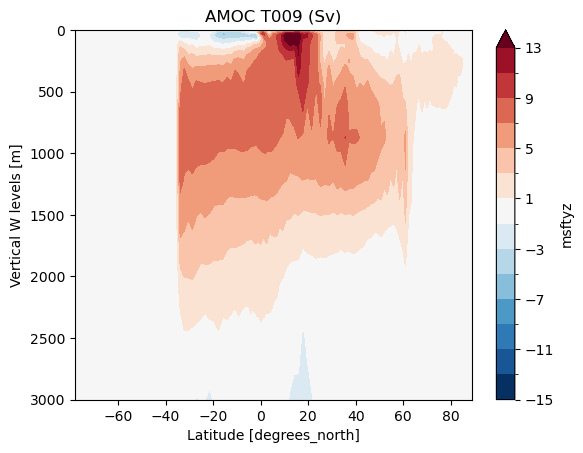

In [50]:
amoc_plot('T009')


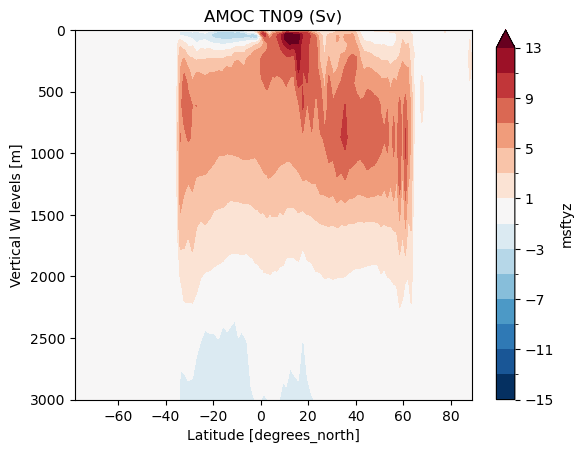

In [49]:
amoc_plot('TN09')

/etc/ecmwf/nfs/dh1_perm_b/ccpd/miniforge3/envs/ecearth-quests/lib/python3.13/site-packages/xarray/groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


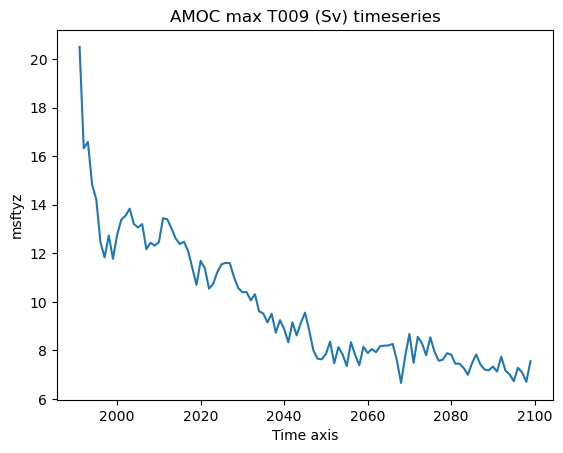

In [12]:
amoc_timeseries('T009')

/etc/ecmwf/nfs/dh1_perm_b/ccpd/miniforge3/envs/ecearth-quests/lib/python3.13/site-packages/xarray/groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


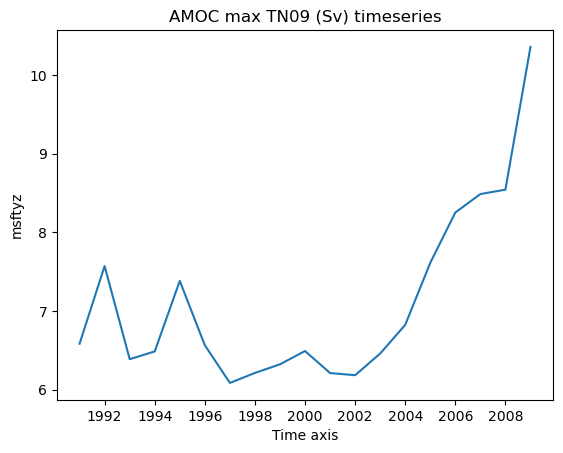

In [11]:
amoc_timeseries('TN09')